In this file we extract data from the OPERA dataset (doi: https://doi.org/10.1186/s13321-018-0263-1, GitHub: https://github.com/kmansouri/OPERA). 

We split the data 80/20 train and test. The test set will be set aside untill the model has been optimized on the training set.

In [1]:
from utils_data import load_data,scale_props,get_graphs
from utils_plotting import plot_property_histograms
df_combined = load_data()
df_combined

Loading data from file


,SMILES,LogVP,LogP,LogOH,LogBCF,LogHalfLife,BP,Clint,FU,LogHL,LogKmHL,LogKOA,LogKOC,MP,LogMolar
0,CC(O)C(=O)O,-1.089900,-0.72,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.8667,1.045401
1,Clc1ccc(C(c2ccc(Cl)cc2)C(Cl)(Cl)Cl)cc1,-6.795899,6.91,NaN,4.29,NaN,NaN,0.866287,0.260000,-5.079877,1.93,9.82,5.31,108.5000,-7.723684
2,O=C(O)c1c(Cl)ccc(Cl)c1Cl,-3.259600,NaN,NaN,0.54,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,124.5000,-1.468200
3,c1ccc2c(c1)cc1ccc3cccc4ccc2c1c34,-8.260400,6.13,NaN,NaN,2.3502,495.0,NaN,NaN,-6.340084,0.05,NaN,5.95,176.5000,-8.113298
4,COC(=O)C1C(OC(=O)c2ccccc2)CC2CCC1N2C,-6.719001,2.30,NaN,NaN,NaN,NaN,NaN,0.106667,NaN,NaN,NaN,NaN,98.0000,-2.240472
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23223,CN(CCO)c1ccc(N=Nc2c(Cl)cc([N+](=O)[O-])cc2Cl)cc1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-6.369572
23224,CCC(O)CNCC(O)CC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.793092
23225,CC(C)(C)C(O)C(=CC1CCCCC1)n1cncn1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.409933
23226,CCC(N)P(=O)(O)O,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.000435


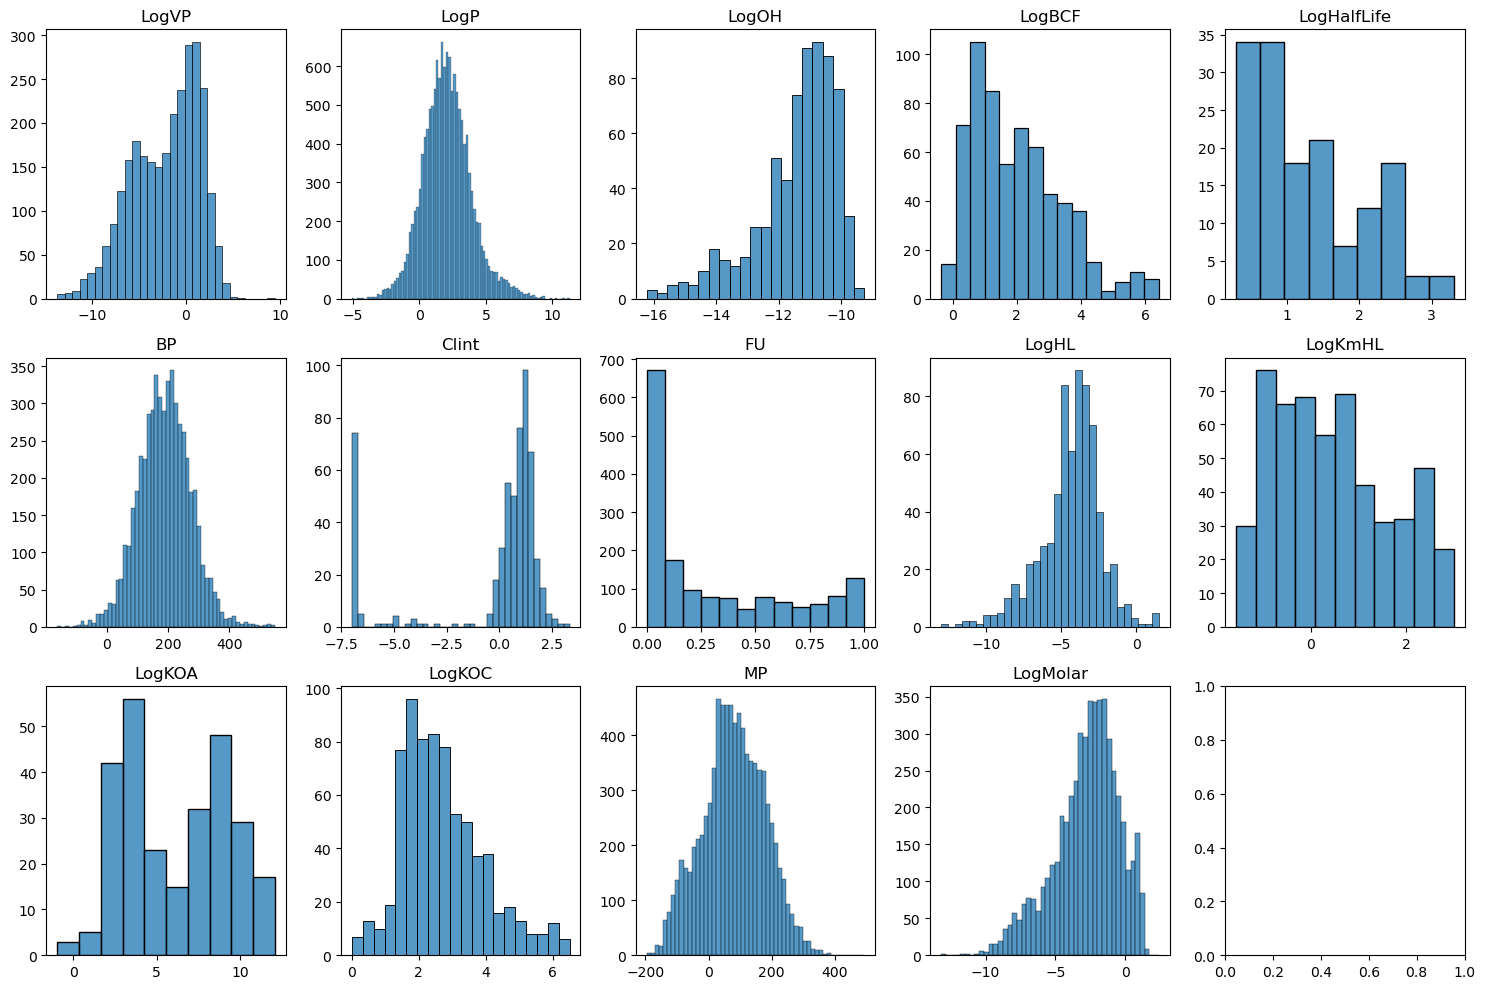

In [10]:
#lets look at the distribution of the properties
plot_property_histograms(df_combined)

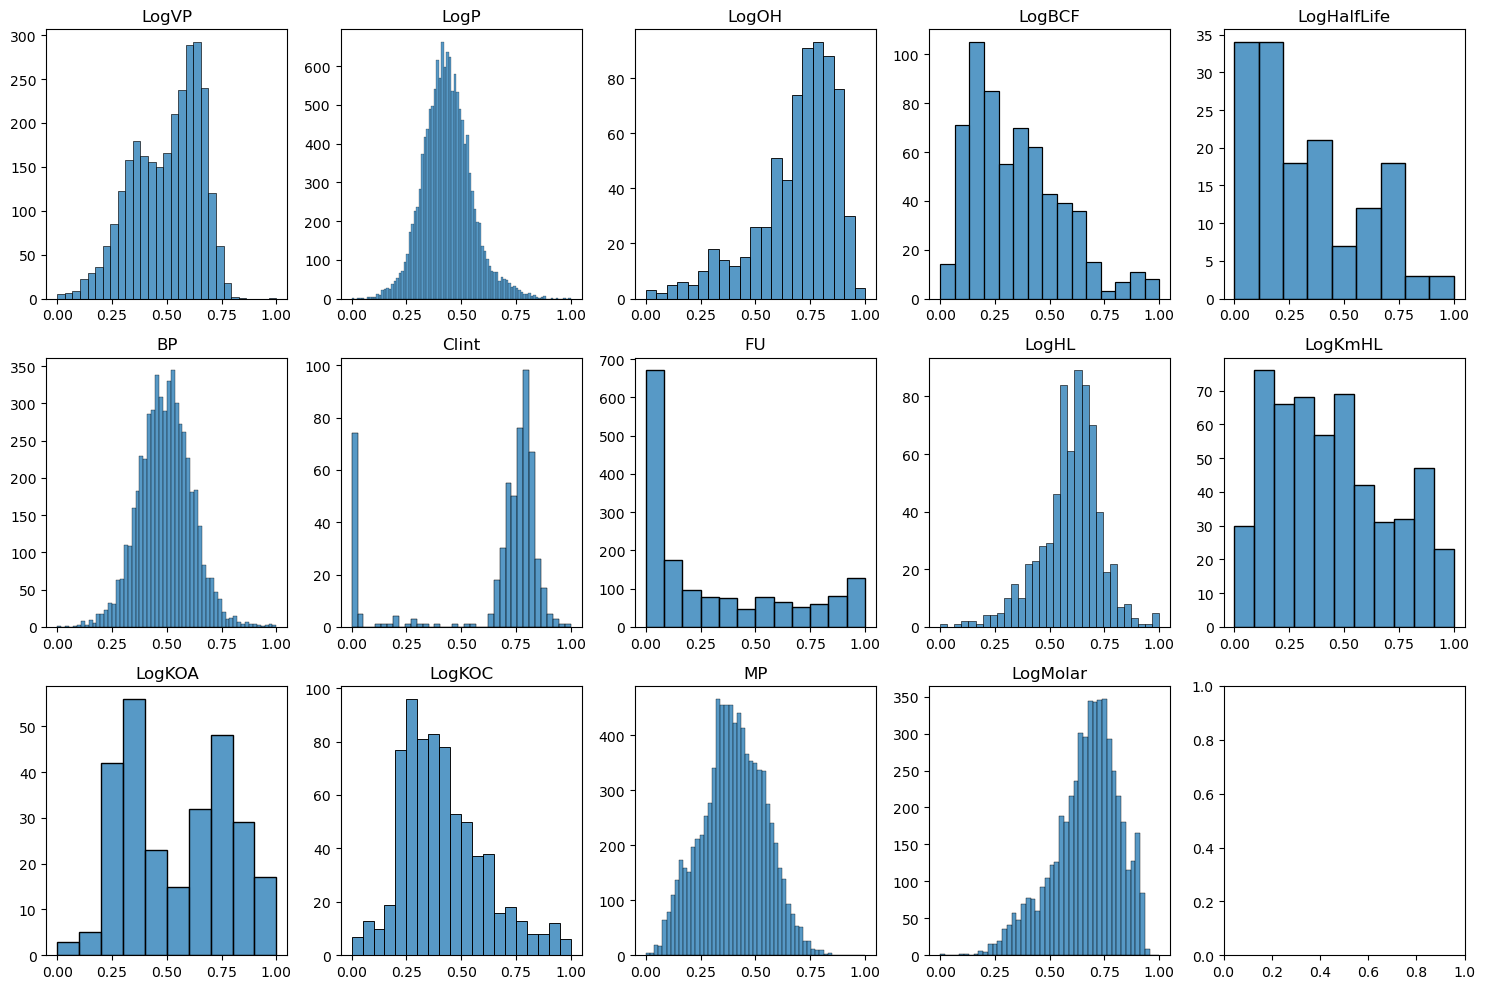

In [11]:
#so quite different ranges, we can scale this to be between 0 and 1
df_scaled,scaler = scale_props(df_combined)
#save scaler for later use as pickle
import pickle
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)
plot_property_histograms(df_scaled)

In [12]:
#split check: if we do a random split 80/20, do we also get a 80/20 split for each property?
from sklearn.model_selection import train_test_split
train, test = train_test_split(df_scaled, test_size=0.2, random_state=42)
for col in df_scaled.columns[1:]:
    print(f'{col}: {test[col].count()/df_scaled[col].count()}')

LogVP: 0.19005328596802842
LogP: 0.20147702014770202
LogOH: 0.17630057803468208
LogBCF: 0.1794871794871795
LogHalfLife: 0.19333333333333333
BP: 0.19860114117430516
Clint: 0.21245421245421245
FU: 0.18753894080996886
LogHL: 0.1750358680057389
LogKmHL: 0.17190388170055454
LogKOA: 0.18518518518518517
LogKOC: 0.19640387275242047
MP: 0.19798657718120805
LogMolar: 0.20590490797546013


LogVP: MannwhitneyuResult(statistic=621562.0, pvalue=0.49065826932018)
LogP: MannwhitneyuResult(statistic=15488690.5, pvalue=0.40507479771496446)
LogOH: MannwhitneyuResult(statistic=34035.5, pvalue=0.7141621324366001)
LogBCF: MannwhitneyuResult(statistic=28190.0, pvalue=0.7805376931248362)
LogHalfLife: MannwhitneyuResult(statistic=1734.0, pvalue=0.9240833659084389)
BP: MannwhitneyuResult(statistic=2301404.0, pvalue=0.3022858571831639)
Clint: MannwhitneyuResult(statistic=25997.0, pvalue=0.48297318456882443)
FU: MannwhitneyuResult(statistic=195347.5, pvalue=0.9007237520137501)
LogHL: MannwhitneyuResult(statistic=34479.0, pvalue=0.7681442811616631)
LogKmHL: MannwhitneyuResult(statistic=21793.0, pvalue=0.48381247999507615)
LogKOA: MannwhitneyuResult(statistic=5109.0, pvalue=0.43333837685050247)
LogKOC: MannwhitneyuResult(statistic=39823.0, pvalue=0.5222747067334923)
MP: MannwhitneyuResult(statistic=5956131.0, pvalue=0.772989287713154)
LogMolar: MannwhitneyuResult(statistic=2194501.0, pvalu

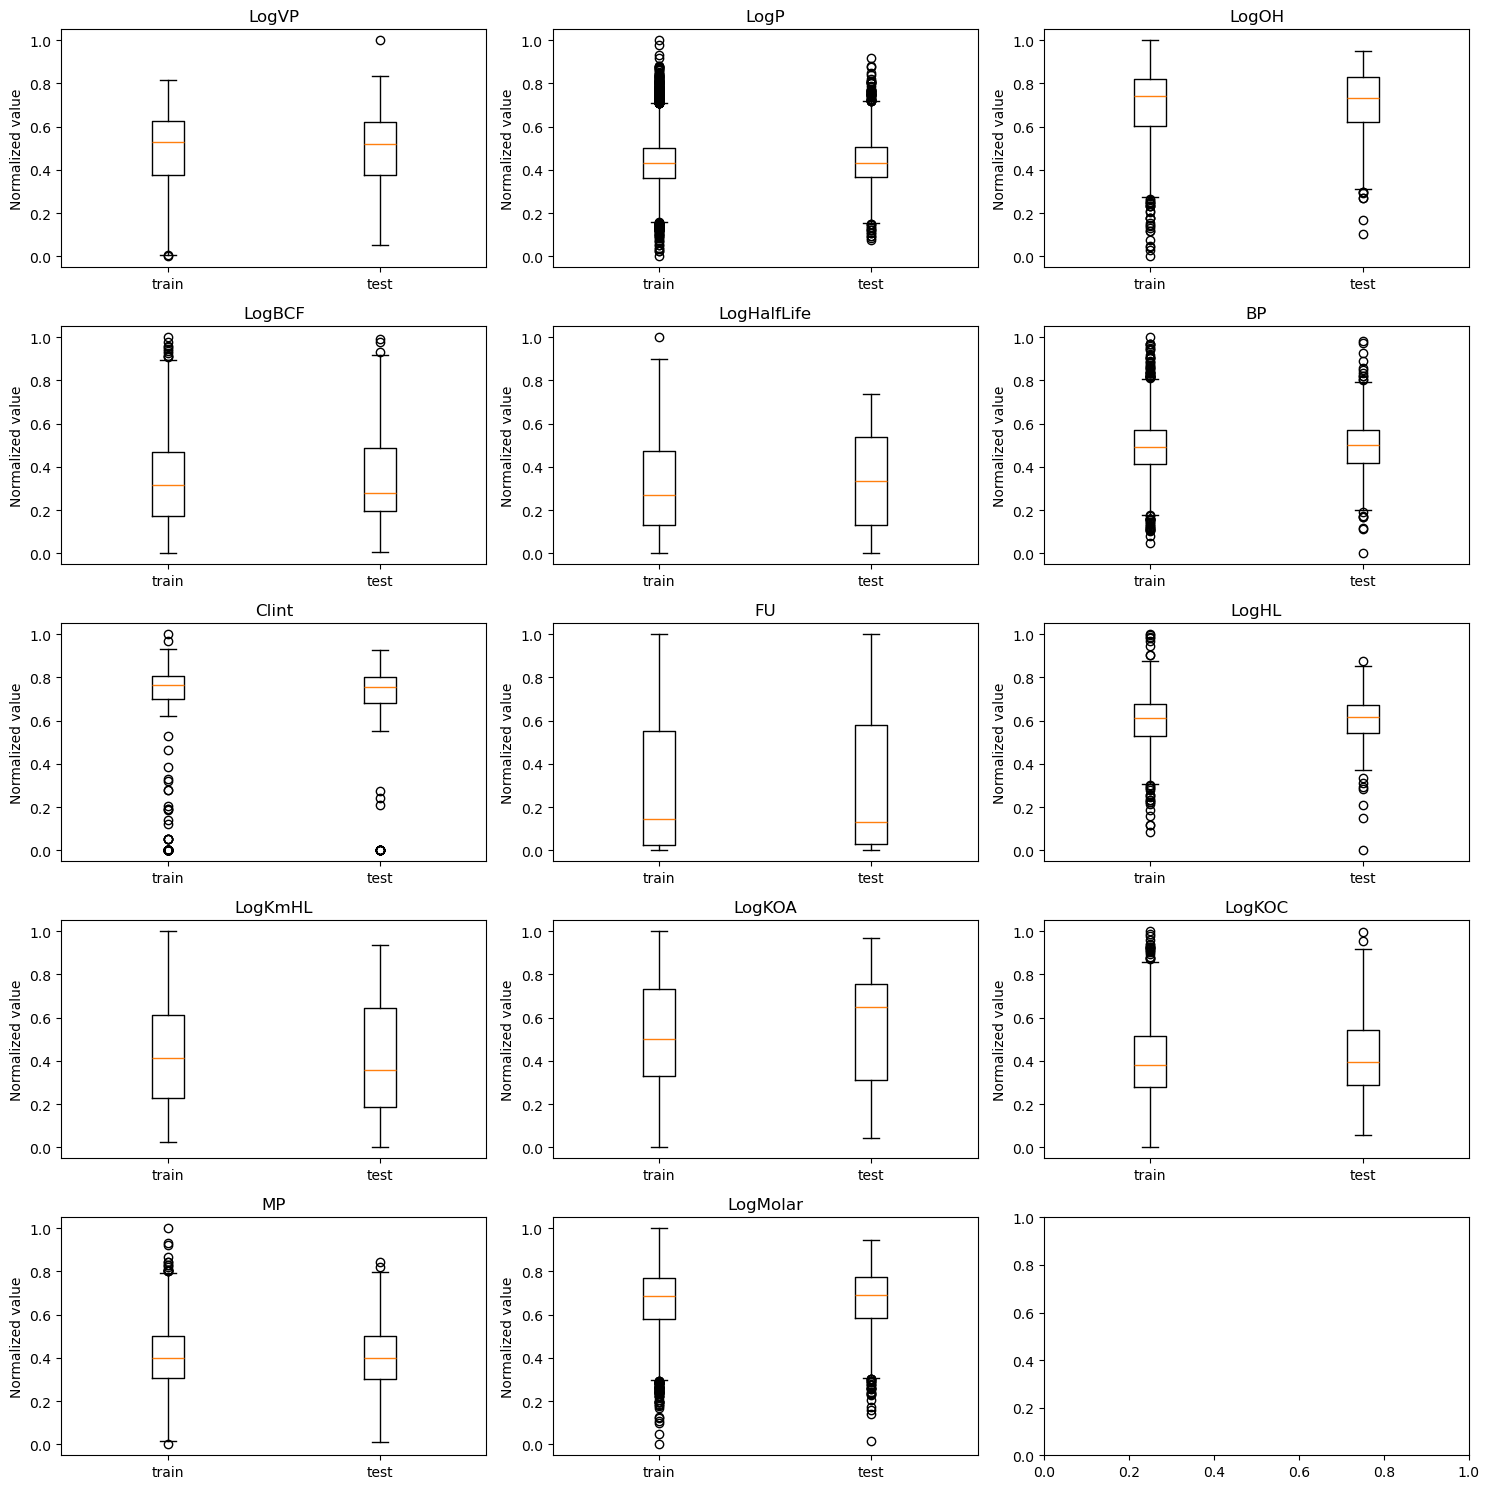

In [13]:
#check if for each property the distribution is similar in train and test
from scipy.stats import mannwhitneyu
for col in df_scaled.columns[1:]:
    train_tmp = train[col].dropna()
    test_tmp = test[col].dropna()
    print(f'{col}: {mannwhitneyu(train_tmp,test_tmp)}')
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(5, 3, figsize=(15, 15))

for i, col in enumerate(df_scaled.columns[1:]):
    train_tmp = train[col].dropna()
    test_tmp = test[col].dropna()
    row = i // 3
    col_i = i % 3
    ax = axes[row, col_i]
    ax.boxplot(x=[train_tmp,test_tmp],labels=['train','test'])
    ax.set_xticklabels(['train', 'test'])
    ax.set_ylabel('Normalized value')
    ax.set_title(col)
plt.tight_layout()
plt.show()


Indeed, we the splitting seems to have worked well, and the test set should be representative of the data we are using

In [14]:
#Check if we really don't have dupliactes:
print(f'duplicated smiles: {df_scaled.SMILES.duplicated().sum()}')
#lets save these splits
train.to_csv('train.csv',index=False)
test.to_csv('test.csv',index=False)
print(len(train),len(test))


duplicated smiles: 0
18582 4646


In [15]:
#get the exact same split of the unscaled data, df_combined
train_unscaled = df_combined[df_combined.SMILES.isin(train.SMILES)]
test_unscaled = df_combined[df_combined.SMILES.isin(test.SMILES)]
train_unscaled.to_csv('train_unscaled.csv',index=False)
test_unscaled.to_csv('test_unscaled.csv',index=False)

In [17]:
#For the training set, lets create some graphs
train_graphs_DASH_charge_scaled = get_graphs(train,dash_charges=True,scaled =True,save_graphs = True)
train_graphs_DASH_charge_unscaled = get_graphs(train_unscaled,dash_charges=True,scaled =False,save_graphs = True)
train_graphs_noDASH_charge_scaled = get_graphs(train,dash_charges=False,scaled =True,save_graphs = True)
train_graphs_noDASH_charge_unscaled = get_graphs(train_unscaled,dash_charges=False,scaled =False,save_graphs = True)

Loading previously created graphs
Creating new graphs
Loading DASH tree data


100%|██████████| 18582/18582 [06:21<00:00, 48.65it/s] 


224 0 224
Creating new graphs
Loading previously created graphs
